In [312]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [313]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (6).csv


In [314]:
raw_data = pd.read_csv('Fraud_check.csv')
raw_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


#Data Exploration

In [315]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [316]:
raw_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [317]:
raw_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [318]:
raw_data[raw_data.duplicated()].sum()

Undergrad          0.0
Marital.Status     0.0
Taxable.Income     0.0
City.Population    0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

#Data Pre-Processing

In [319]:
value = raw_data['Taxable.Income'].max()
value

99619

In [320]:
# Now lets divide the Sales value into  categories (Risky, Safe)
range = 0.35*value
range

34866.649999999994

In [321]:
#Lets assume taxable_income <= 35000 as Risky(0) and others are Good(1)
data = raw_data.copy()
data['taxable_status'] = pd.cut(x = data['Taxable.Income'], bins = [0,35000,99620], labels = ['Risky', 'Good'])
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


#Splitting into categorical and numerical variables

In [322]:
categorical_variables = data.describe(include=['object','category']).columns
categorical_variables

Index(['Undergrad', 'Marital.Status', 'Urban', 'taxable_status'], dtype='object')

In [323]:
numerical_variables = data.describe(include=['int64']).columns
numerical_variables

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

#Data Visualization


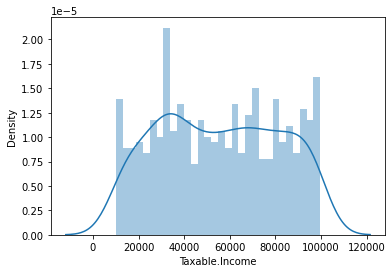

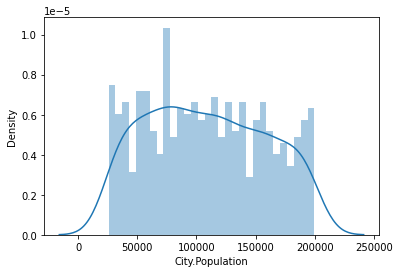

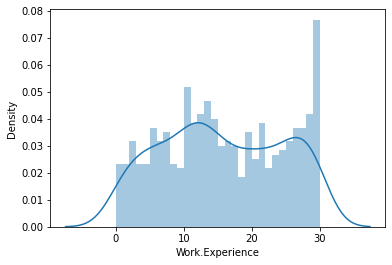

In [324]:
for i in numerical_variables:
    sns.distplot(data[i], kde= True, bins=30)
    plt.show()

In [325]:
# Outlier Detection
from collections import Counter
features = data.columns
df = data.copy()
o = []

def outlier(df):
  outlier_indices = []

  for col in df.columns.tolist():
      Q1 = np.percentile(df[col], 25)
      Q3 = np.percentile(df[col],75)
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      
      outlier_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_col)
      
  outlier_indices = Counter(outlier_indices)        
  outliers = list( k for k, v in outlier_indices.items() if v > 2 )
  o = outliers.copy()

  return outliers  

print("Total of {} outliers detected: ".format(len(o)),o)

Total of 0 outliers detected:  []


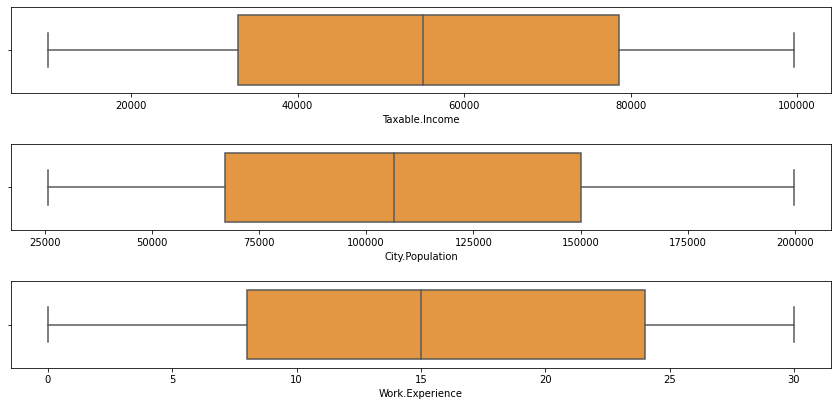

In [326]:
fig, axes=plt.subplots(3,1,figsize=(12,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=data,palette='YlOrBr',ax=axes[0])
sns.boxplot(x='City.Population',data=data,palette='YlOrBr',ax=axes[1])
sns.boxplot(x='Work.Experience',data=data,palette='YlOrBr',ax=axes[2])
plt.tight_layout(pad=2.0)

<Figure size 576x576 with 0 Axes>

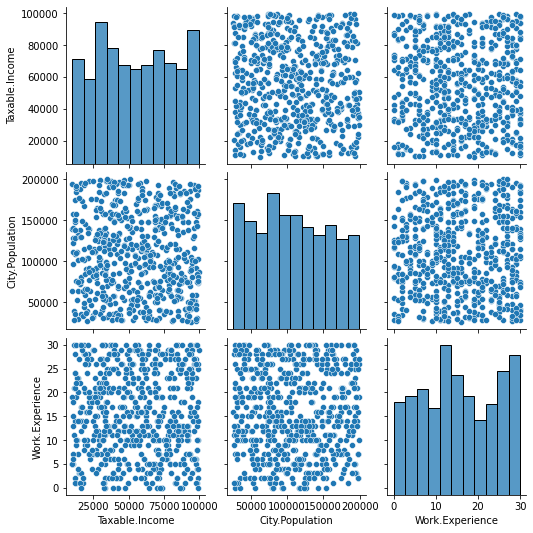

In [327]:
plt.figure(figsize=(8,8))
sns.pairplot(df)
plt.show()

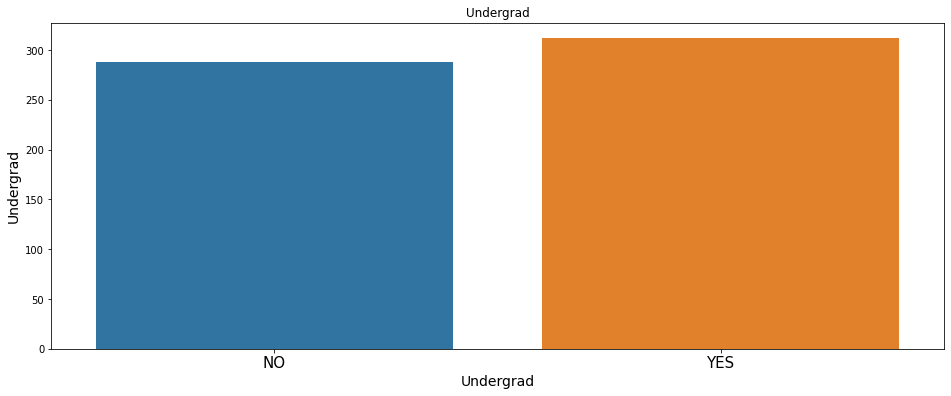

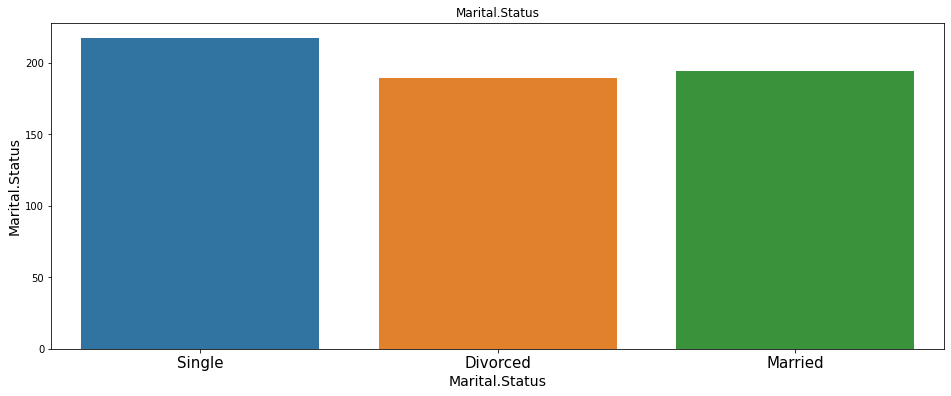

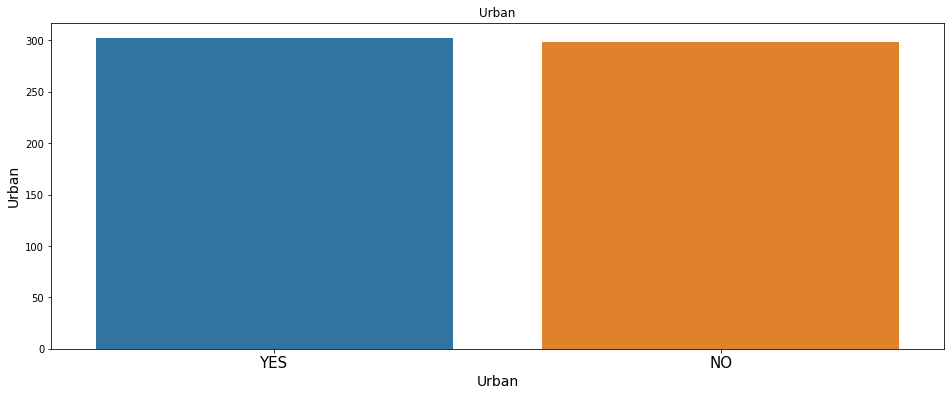

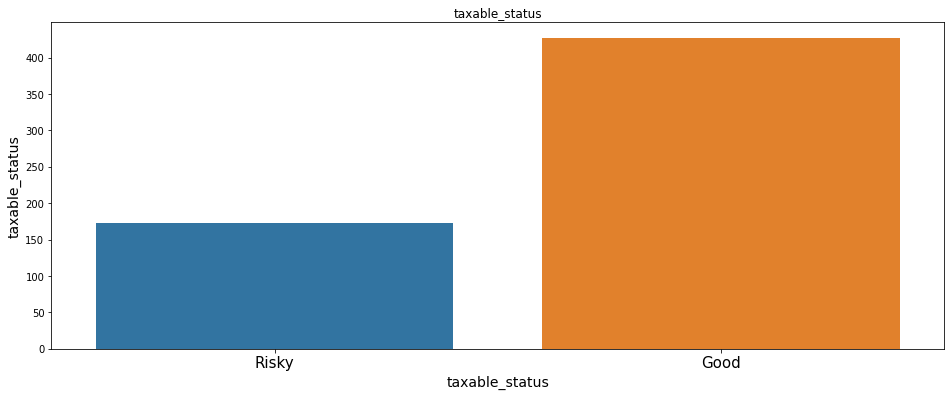

In [286]:
for col in categorical_variables:
    plt.figure(figsize=(16, 6))
    unique = data[col].value_counts(ascending=True);
 
    plt.title(col)
    sns.countplot(data=data, x=col)
    plt.xticks(rotation = 0, size = 15)
    plt.xlabel(col, fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.show()

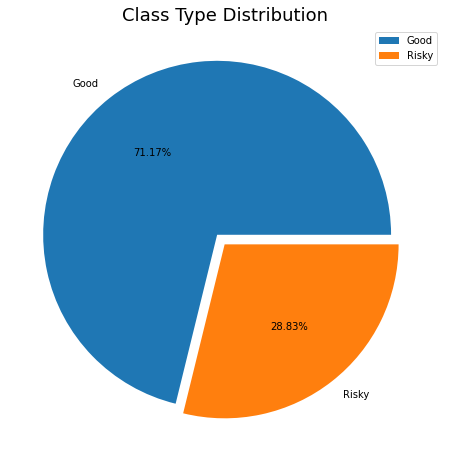

Percentage of Customer who doesn't have a term deposit: 71.17%
Percentage of Customer who have a term deposit: 28.83%


In [287]:
plt.figure(figsize = (12,8))
plt.pie(data['taxable_status'].value_counts(),
       labels=data.taxable_status.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%')
plt.legend()
plt.title("Class Type Distribution", fontsize = 18)
plt.show()

print("Percentage of Customer who doesn't have a term deposit: {:.2f}%".format((len(data[data['taxable_status'] == 'Good']) / (len(df.taxable_status))*100)))
print("Percentage of Customer who have a term deposit: {:.2f}%".format((len(data[data['taxable_status'] == 'Risky']) / (len(df.taxable_status))*100)))

In [288]:
data.taxable_status.value_counts()

Good     427
Risky    173
Name: taxable_status, dtype: int64

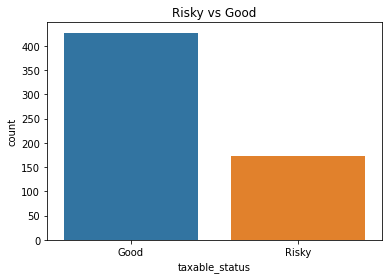

In [289]:

sns.countplot(x='taxable_status', data=data, order=data['taxable_status'].value_counts().index)
plt.title('Risky vs Good')
plt.show()

#Feature Engineering

In [290]:
data1 = data.copy()
data1.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
data1.drop('Taxable_Income', axis=1, inplace = True)

In [291]:
categorical_variables = data1.describe(include=["object",'category']).columns
categorical_variables

Index(['Undergrad', 'Marital_Status', 'Urban', 'taxable_status'], dtype='object')

In [292]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_variables:
        le.fit(data1[col])
        data1[col] = le.transform(data1[col])
data1

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,1
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


# Splitting train dataset into input(x) & output(y)

In [293]:
x = data1.drop('taxable_status',axis=1)
y = data1['taxable_status']

In [294]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_ix, test_ix in skf.split(x, y):
    train_x, test_x = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

    train, train1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test, test1 = len(test_y[test_y==0]), len(test_y[test_y==1])

In [295]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [296]:
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])

In [297]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (420, 5)
Shape of X_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test:  (180,)


#Decision Tree

In [298]:
params = {"criterion":("gini", "entropy"), "splitter":("best", "random"), 
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], "min_samples_split":[2, 3, 4], "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

tree_dtc = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_dtc, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_x, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_dtc = DecisionTreeClassifier(**best_params)
tree_dtc.fit(train_x, train_y)
tree_dtc

Fitting 3 folds for each of 4800 candidates, totalling 14400 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeClassifier(max_depth=3, min_samples_leaf=7)

In [299]:
dtc = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

from sklearn.model_selection import cross_val_score

results = cross_val_score(dtc, train_x, train_y, cv=skf)
print(results.mean())

0.5944444444444443


#Oversampling technique

In [300]:
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import confusion_matrix

ost = [SMOTE,ADASYN,SMOTETomek,SMOTEENN]

for i in ost:
  counter = Counter(y_train)
  print('\033[1m'+'With {} technique'.format(i)+'\033[0m')
  print('Before',counter)
  teq = i()
  x_train_sm, y_train_sm = teq.fit_resample(x_train, y_train)
  y_pred = tree_dtc.predict(x_test)

  counter = Counter(y_train_sm)
  print('After',counter,'\n')
  print(confusion_matrix(y_test,y_pred),"\n")
  print('Classification Report')
  print('='*60)
  print(classification_report(y_test,y_pred))

With <class 'imblearn.over_sampling._smote.base.SMOTE'> technique
Before Counter({0: 299, 1: 121})
After Counter({0: 299, 1: 299}) 

[[126   2]
 [ 49   3]] 

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       128
           1       0.60      0.06      0.11        52

    accuracy                           0.72       180
   macro avg       0.66      0.52      0.47       180
weighted avg       0.69      0.72      0.62       180

With <class 'imblearn.over_sampling._adasyn.ADASYN'> technique
Before Counter({0: 299, 1: 121})
After Counter({1: 302, 0: 299}) 

[[126   2]
 [ 49   3]] 

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       128
           1       0.60      0.06      0.11        52

    accuracy                           0.72       180
   macro avg       0.66      0.52      0.47       180
weighted avg       0.69      0.72      0.62 

When we compare results, SMOTE-TOMEK Hybridization technique gave the best results.

**Hence, we are going to use SMOTE-TOMEK for further analysis.**

In [301]:
# SMOTE-TOMEK Technique
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtomek = SMOTETomek(random_state=0)
x_train_smtomek, y_train_smtomek = smtomek.fit_resample(x, y)

counter = Counter(y_train_smtomek)
print('After',counter)

Before Counter({0: 427, 1: 173})
After Counter({0: 307, 1: 307})


In [302]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtomek,y_train_smtomek,test_size=0.3,random_state=0, stratify=y_train_smtomek)

In [303]:
counter = Counter(y_train_smtomek)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Before Counter({0: 307, 1: 307})
After Counter({1: 215, 0: 214})
Shape of X_train:  (429, 5)
Shape of X_test:  (185, 5)
Shape of y_train:  (429,)
Shape of y_test:  (185,)


#Pruning

In [304]:
params = {"criterion":("gini", "entropy"), "splitter":("best", "random"), 
    "max_depth":[1,2,3,4,5,6], "min_samples_split":[2, 3, 4], "min_samples_leaf":[1,2,3,4,5,6]}

tree_dtc = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_dtc, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_dtc = DecisionTreeClassifier(**best_params)
tree_dtc.fit(x_train, y_train)
tree_dtc

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeClassifier(criterion='entropy', max_depth=6)

**1) Building Decision Tree Classifier using Entropy Criteria post Pruning**

In [305]:
dtc = DecisionTreeClassifier

In [306]:
model_entropy = dtc(criterion='entropy', random_state=0)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

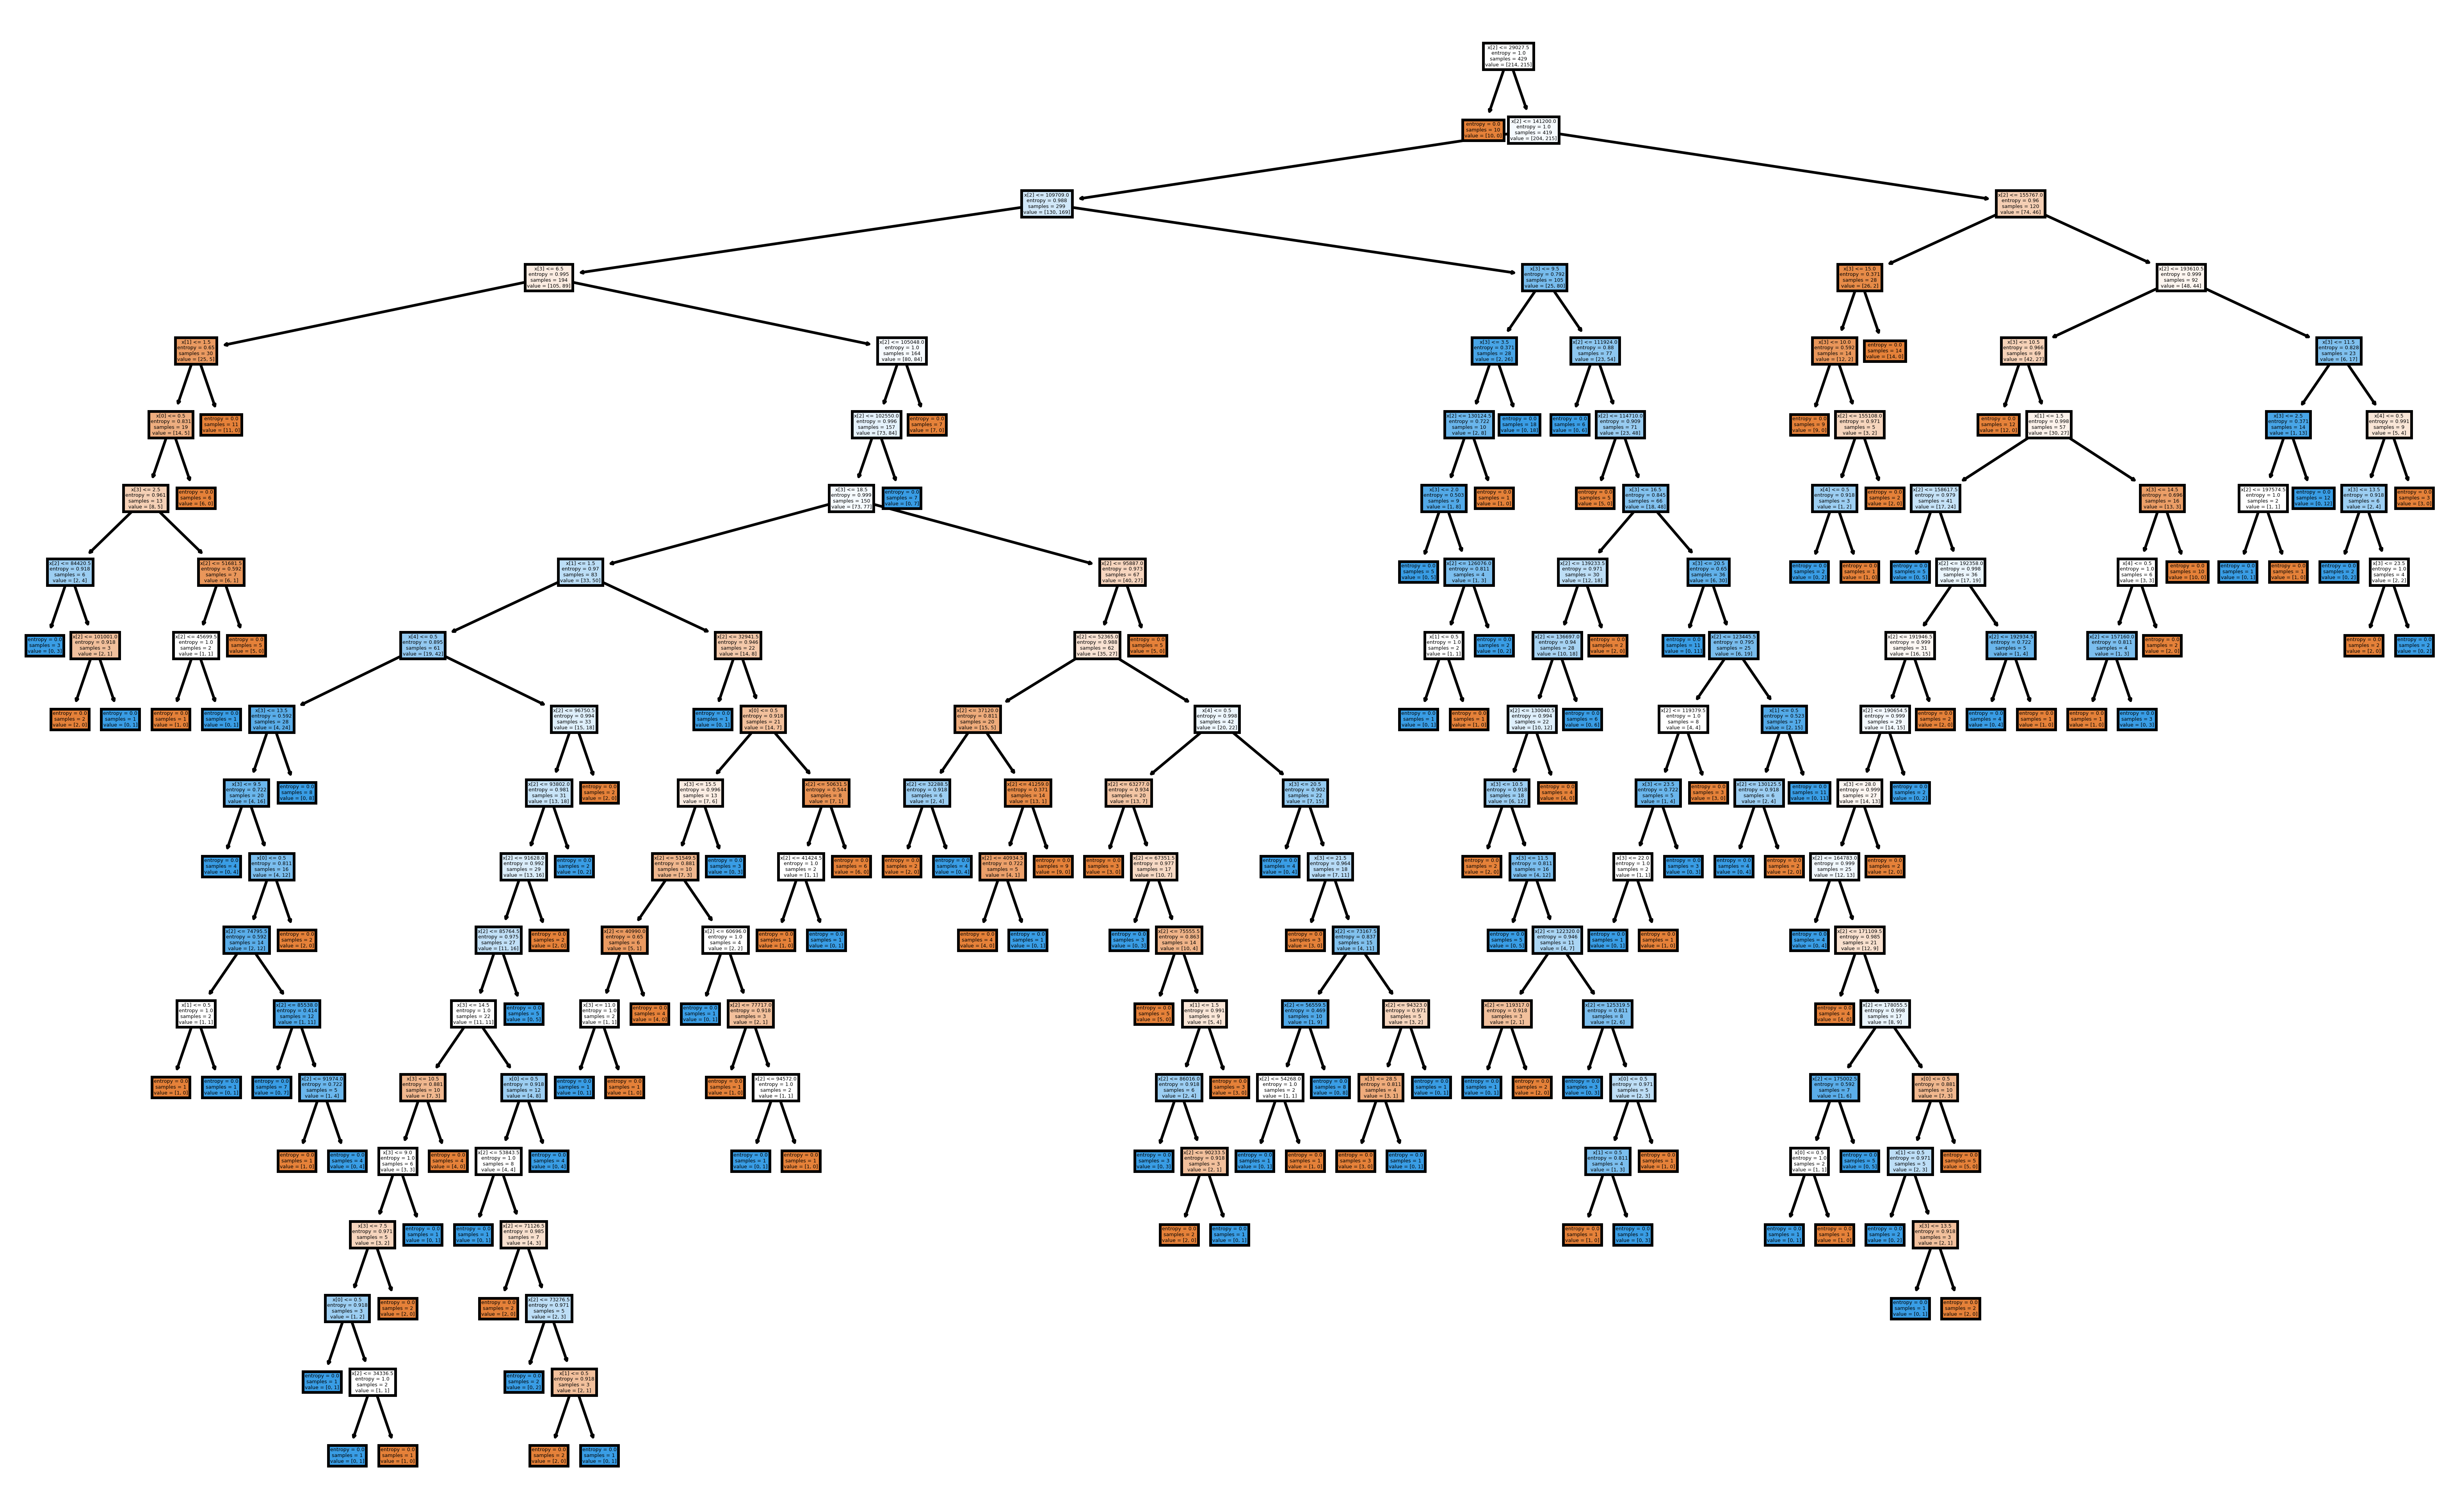

In [307]:
plt.figure(figsize=(16,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [308]:
preds = model_entropy.predict(x_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68        93
           1       0.68      0.73      0.70        92

    accuracy                           0.69       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.69      0.69      0.69       185



**2) Building Decision Tree Classifier using Gini Criteria post Pruning**

In [309]:
model_gini = dtc(criterion='gini', random_state=0)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

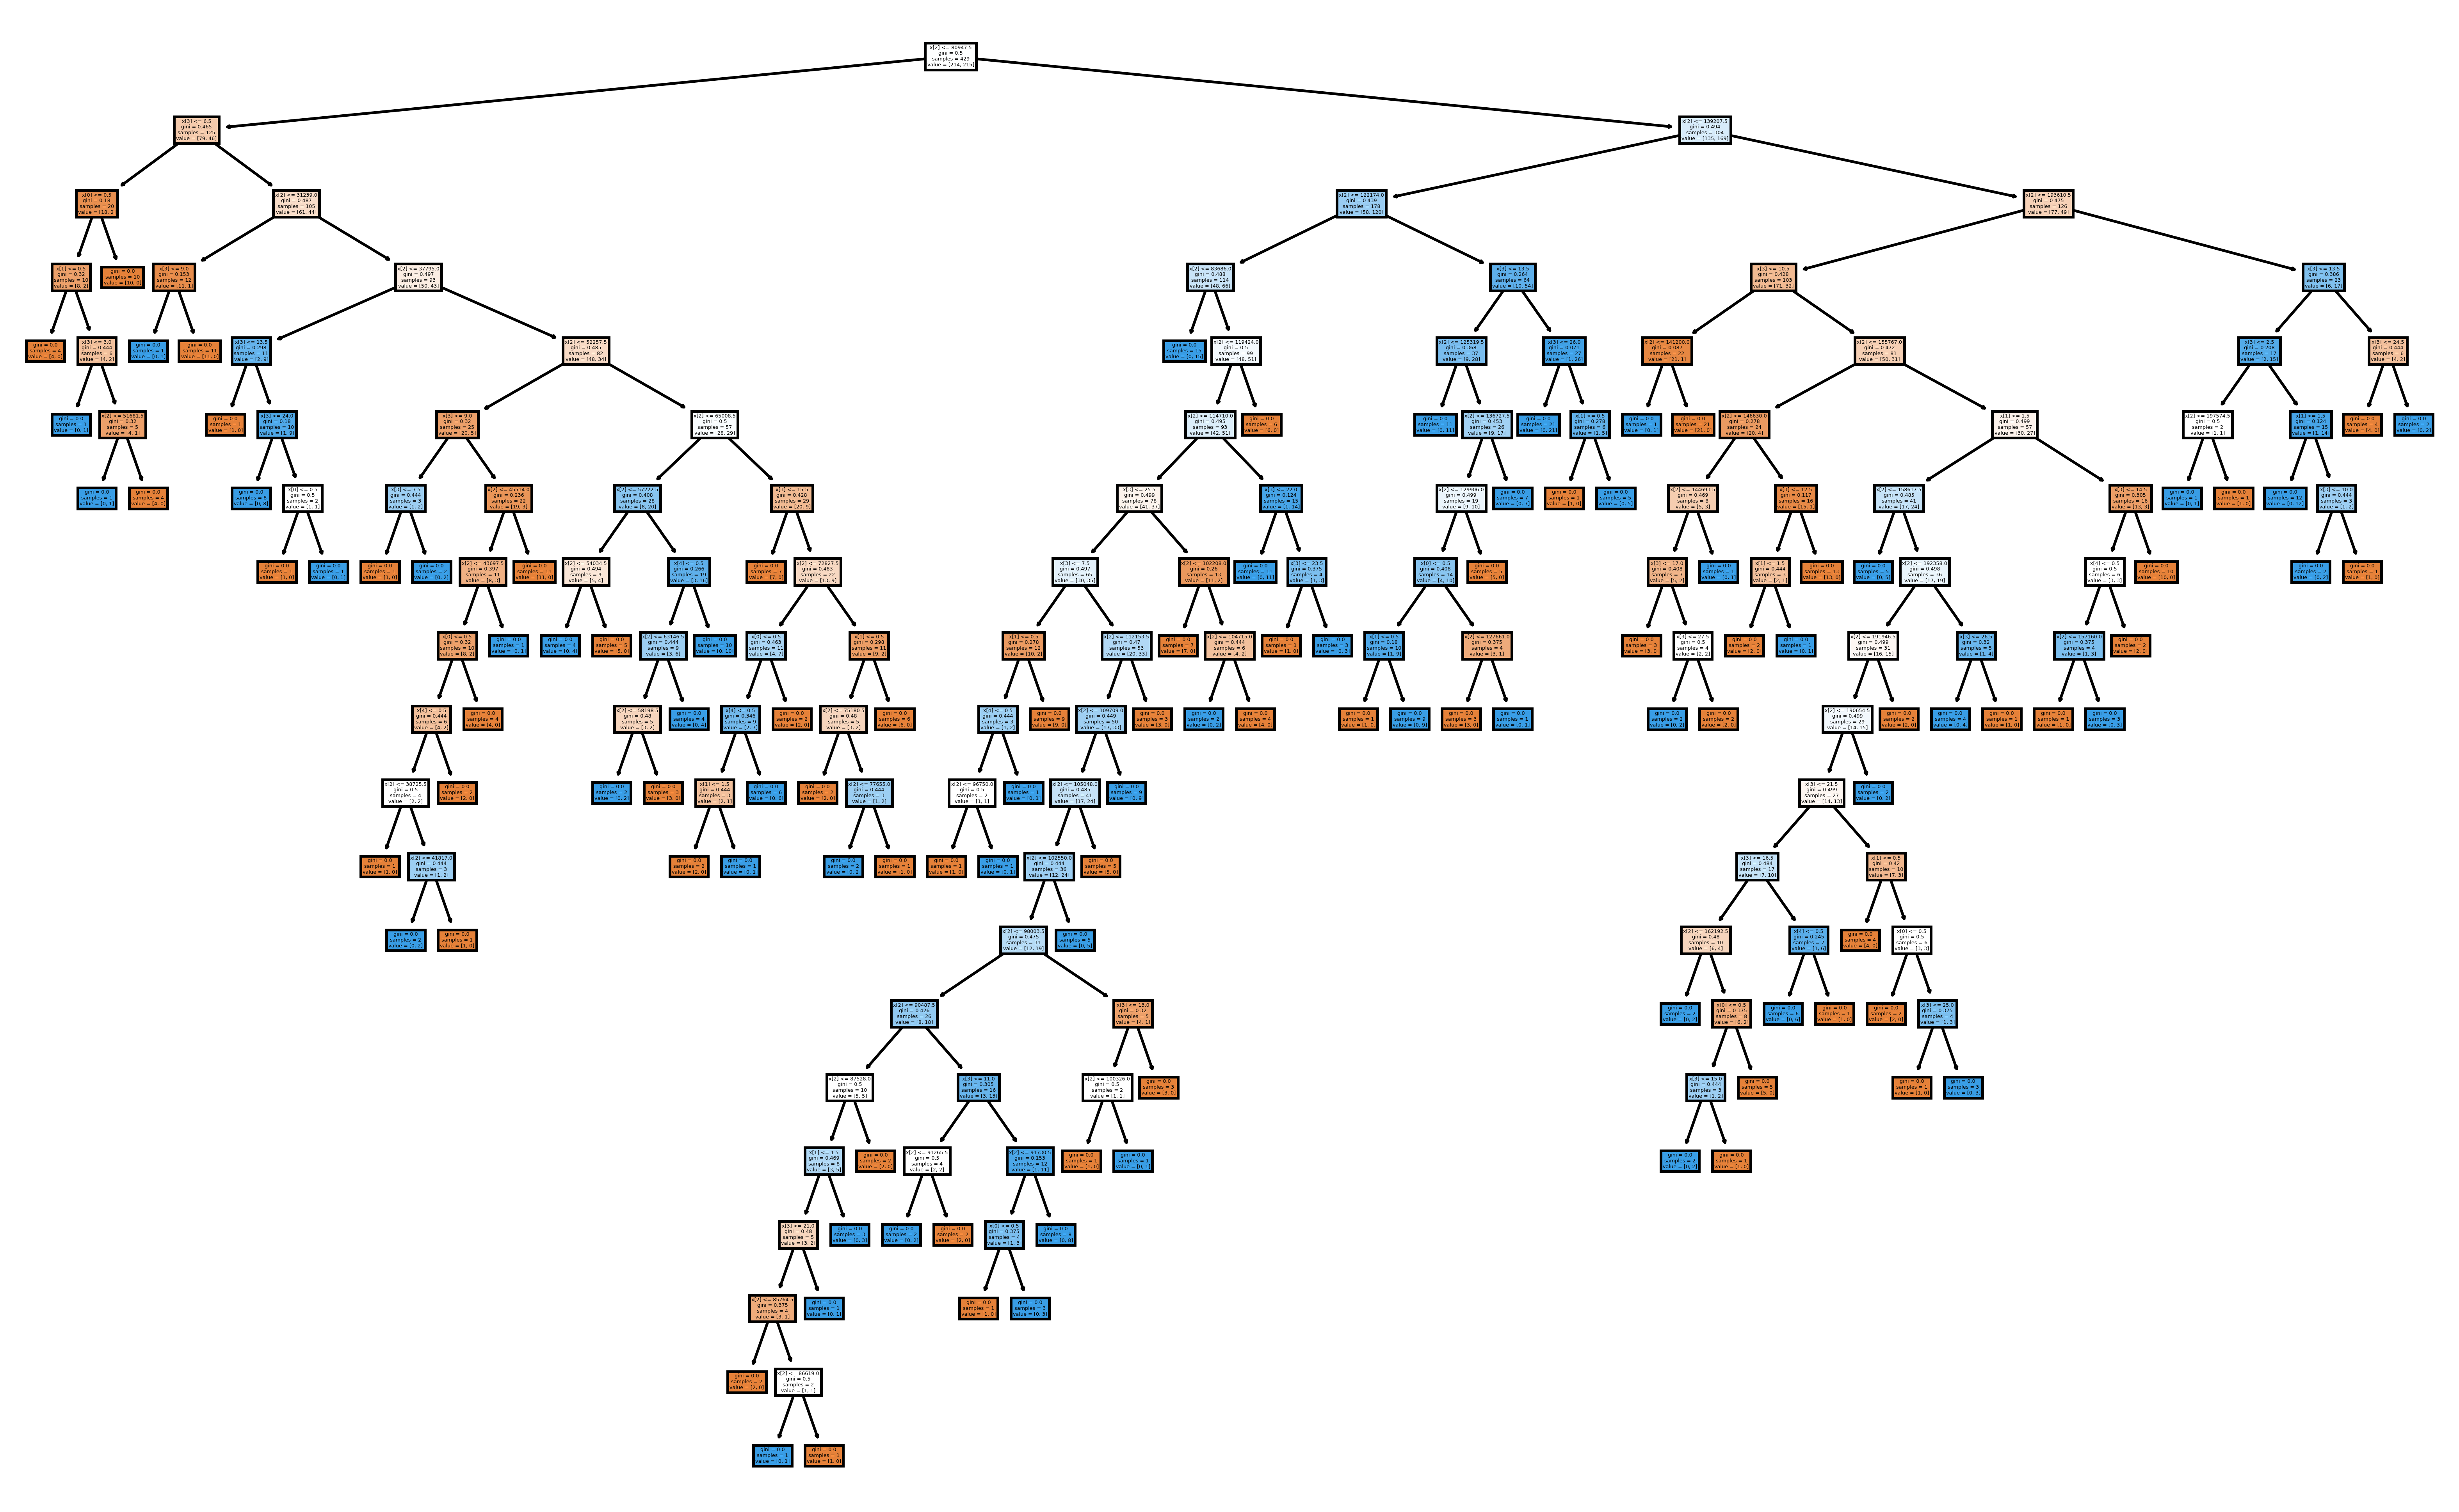

In [310]:
plt.figure(figsize=(16,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

In [311]:
preds = model_gini.predict(x_test)
print(classification_report(y_test,preds))  

              precision    recall  f1-score   support

           0       0.66      0.69      0.67        93
           1       0.67      0.64      0.66        92

    accuracy                           0.66       185
   macro avg       0.67      0.66      0.66       185
weighted avg       0.67      0.66      0.66       185



#Conclusion

Out of both the model results, Entropy Model Hybridization technique gave the best results with accuracy & other parameter scores was found to be better.

**Hence, Entropy Model can be considered.**